In [1]:
from dreimac import GeometryExamples, PlotUtils, ComplexProjectiveCoords, ProjectiveMapUtils, GeometryUtils

from dreimac import PartUnity

import matplotlib.pyplot as plt
import numpy as np
from persim import plot_diagrams

%load_ext autoreload
%autoreload 2

<AxesSubplot: >

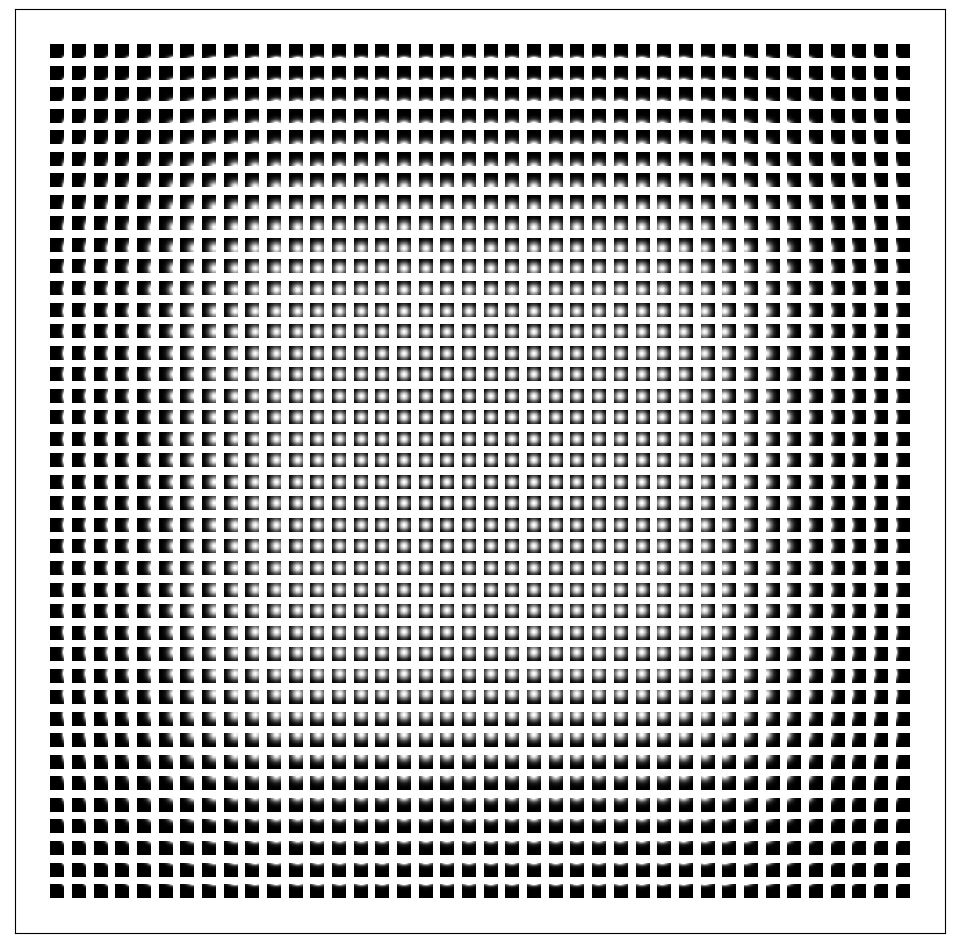

In [2]:
def moving_dot(sqrt_num_images):
    def gkern(l=5, mu=0, sig=1.):
        ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
        gauss_x = np.exp(-0.5 * np.square(ax - mu[0]) / np.square(sig))
        gauss_y = np.exp(-0.5 * np.square(ax - mu[1]) / np.square(sig))
        kernel = np.outer(gauss_x, gauss_y)
        return kernel

    img_len = 10
    P = np.zeros((sqrt_num_images**2,img_len*img_len))
    bound = 15
    xs = bound * np.power(np.linspace(-1,1,sqrt_num_images), 3)
    ys = -xs
    i = 0
    for x in xs:
        for y in ys:
            P[i] = gkern(l=img_len, mu=np.array([x,y]), sig=3).flatten()
            i+=1
    return P

P = moving_dot(40)

plt.figure(figsize=(12,12))
PlotUtils.plot_patches(P, zoom=1)

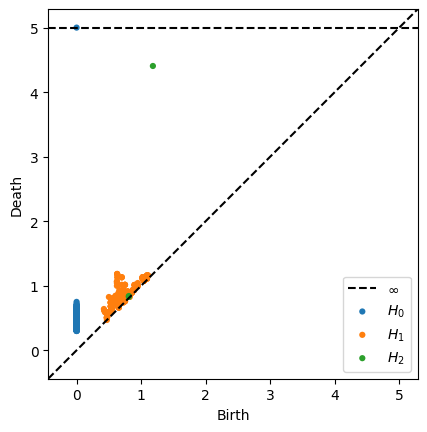

In [3]:
cpc = ComplexProjectiveCoords(P, n_landmarks=400)

fig = plt.figure()
plot_diagrams(cpc.dgms_)

In [4]:
coords = cpc.get_coordinates(perc=0.3, partunity_fn=PartUnity.exp)
print(coords.shape)
coords_R3 = ProjectiveMapUtils.hopf_map(coords)

(1600, 2)


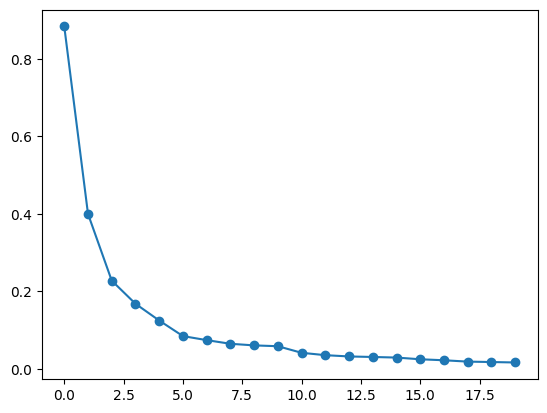

In [5]:
plt.plot(cpc.variance_[:20], "-o")

(1600, 2)


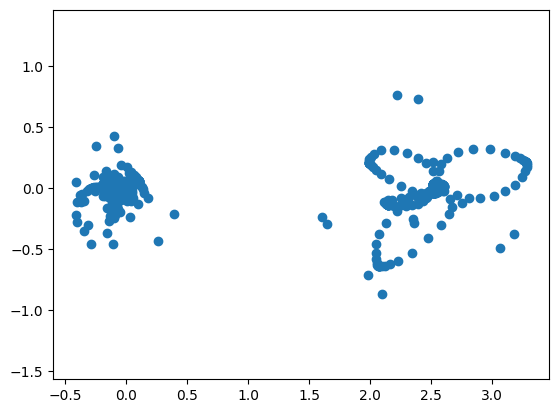

In [6]:
coords_R2 = ProjectiveMapUtils.stereographic_projection_hemispheres(coords_R3)
print(coords_R2.shape)
fig = plt.figure()
plt.scatter(coords_R2[:,0], coords_R2[:,1])
_ = plt.axis("equal")

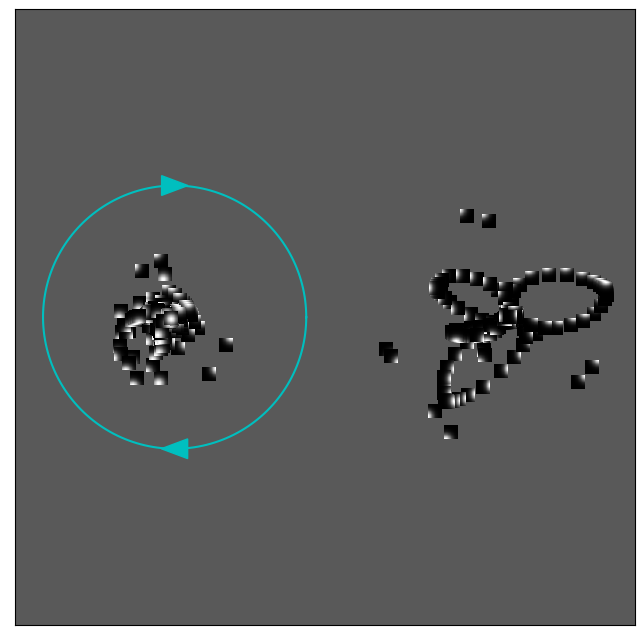

In [7]:
subsample = GeometryUtils.get_greedy_perm_pc(coords_R2, 400)['perm']

plt.figure(figsize=(8, 8))
PlotUtils.imscatter(coords_R2[subsample, :], P[subsample, :], 10)
_ = PlotUtils.plot_proj_boundary()